# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Superstore Marketing Data - Sheet1 (1).csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df['Dt_Customer'].eq('########').sum()

916



*   The Income column has 24 missing values.
*   The Dt_Customer column contains "########" 916 times.





In [ ]:
df['Response'].unique()

array([1, 0])

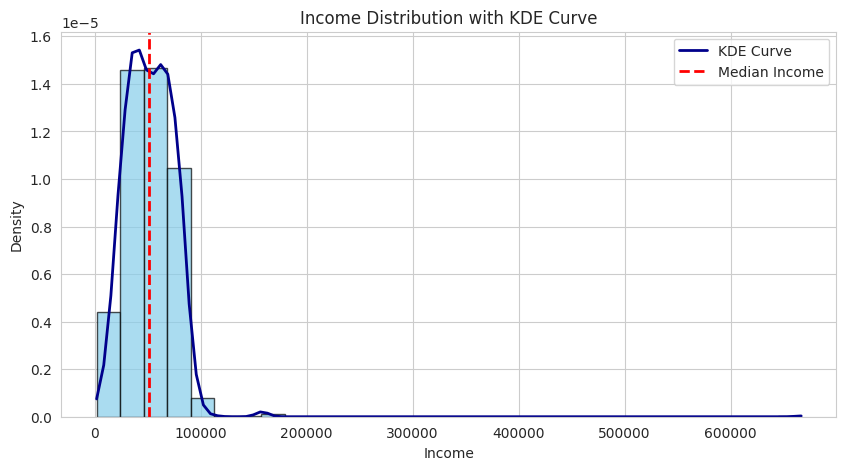

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure
plt.figure(figsize=(10, 5))

# Plot histogram
plt.hist(df['Income'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7, density=True)

# Plot KDE curve manually
from scipy.stats import gaussian_kde
income_values = df['Income'].dropna()  # Remove NaN values
kde = gaussian_kde(income_values)
x_range = np.linspace(min(income_values), max(income_values), 100)
plt.plot(x_range, kde(x_range), color='darkblue', linewidth=2, label='KDE Curve')

# Highlight median
plt.axvline(df['Income'].median(), color='red', linestyle='dashed', linewidth=2, label='Median Income')

# Labels and title
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Income Distribution with KDE Curve')
plt.legend()

# Show plot
plt.show()



In [ ]:
# Calculate mean and median of the Income column
mean_income = df['Income'].mean()
median_income = df['Income'].median()

print("Mean Income:", mean_income)
print("Median Income:", median_income)

Mean Income: 52247.25135379061
Median Income: 51381.5




*   Since the Mean Income  is slightly higher than the Median Income, this suggests the income data is right-skewed slightly.
* Since the median is less affected by outliers, we will use the median to fill missing values.
* Mean is pulled by high incomes, but the median stays stable. so we can impute income missing value with median.


In [ ]:
# filling missing values in Income with median
df['Income'].fillna(df['Income'].median(), inplace=True)

<ipython-input-78-d81742d39784>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)




* We have to replace "########" in 'Dt_Customer'  with NaT (Not a Time), which is the correct way to represent missing dates in pandas.



In [ ]:
df['Dt_Customer'] = df['Dt_Customer'].replace('########', pd.NaT)
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,NaT,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,NaT,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,NaT,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,NaT,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [ ]:
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,916
Recency,0
MntWines,0


In [ ]:
df.dtypes

,0
Id,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


* Dt_Customer should be converted to a datetime format.
* Education and Marital_Status should be treated as categorical variables.
* For analysis we should convert Response and Complain to category


In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Education'] = df['Education'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Response'] = df['Response'].astype('category')
df['Complain'] = df['Complain'].astype('category')

In [ ]:
df.dtypes

,0
Id,int64
Year_Birth,int64
Education,category
Marital_Status,category
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntWines,int64


Summary of Basic Statistic

Age Statistics:
count    2240.000000
mean       56.194196
std        11.984069
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64


<ipython-input-84-56d7cc7f5339>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Education'], palette="pastel", ax=axes[1])
<ipython-input-84-56d7cc7f5339>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Marital_Status'], palette="muted", ax=axes[2])


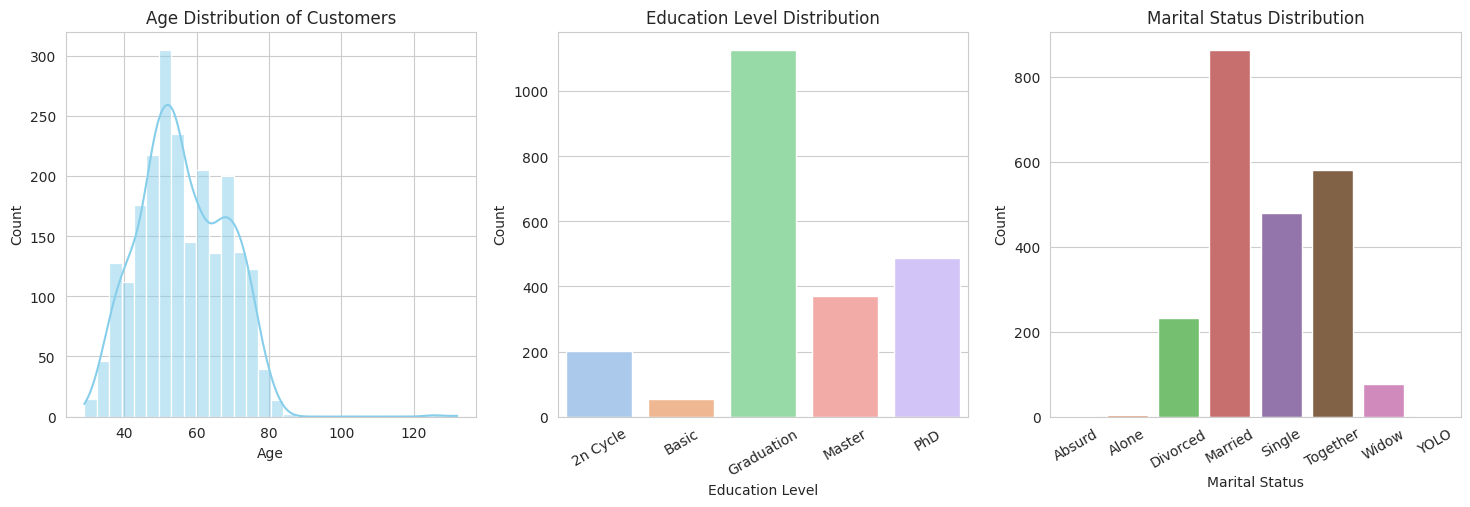

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Year_Birth to Age
df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')
df['Age'] = 2025 - df['Year_Birth']

# Descriptive Statistics for Age
print("Age Statistics:")
print(df['Age'].describe())

# Count values for categorical variables
education_counts = df['Education'].value_counts()
marital_counts = df['Marital_Status'].value_counts()

# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Age Distribution
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Age Distribution of Customers")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# 2. Education Distribution
sns.countplot(x=df['Education'], palette="pastel", ax=axes[1])
axes[1].set_title("Education Level Distribution")
axes[1].set_xlabel("Education Level")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=30)

# 3. Marital Status Distribution
sns.countplot(x=df['Marital_Status'], palette="muted", ax=axes[2])
axes[2].set_title("Marital Status Distribution")
axes[2].set_xlabel("Marital Status")
axes[2].set_ylabel("Count")
axes[2].tick_params(axis='x', rotation=30)

# Show plots
plt.show()



*   The histogram shows that most customers are aged between 40-70 years.
*   There are some outliers (ages above 100)
*   Most customers have a Graduation degree.
*   Master's and PhD holders also form a significant portion.
*   Few customers have only Basic education.
*   The majority of customers are Married, followed by Together and Single.
*   There are some unusual categories like "Absurd" and "YOLO" – you may want to clean these.




In [ ]:
import pandas as pd

# Compute summary statistics
summary_stats = pd.DataFrame({
    'Mean': df.mean(numeric_only=True),
    'Median': df.median(numeric_only=True),
    'Standard Deviation': df.std(numeric_only=True),
    'Variance': df.var(numeric_only=True)
})

# Display the table
print(summary_stats)

                             Mean   Median  Standard Deviation      Variance
Id                    5592.159821   5458.5         3246.662198  1.054082e+07
Year_Birth            1968.805804   1970.0           11.984069  1.436179e+02
Income               52237.975446  51381.5        25037.955891  6.268992e+08
Kidhome                  0.444196      0.0            0.538398  2.898725e-01
Teenhome                 0.506250      0.0            0.544538  2.965219e-01
Recency                 49.109375     49.0           28.962453  8.388237e+02
MntWines               303.935714    173.5          336.597393  1.132978e+05
MntFruits               26.302232      8.0           39.773434  1.581926e+03
MntMeatProducts        166.950000     67.0          225.715373  5.094743e+04
MntFishProducts         37.525446     12.0           54.628979  2.984325e+03
MntSweetProducts        27.062946      8.0           41.280498  1.704080e+03
MntGoldProds            44.021875     24.0           52.167439  2.721442e+03

In [ ]:
# Total amount spent by each customer
df["TotalSpent"] = (
    df["MntFishProducts"] + df["MntMeatProducts"] + df["MntFruits"] +
    df["MntSweetProducts"] + df["MntWines"] + df["MntGoldProds"]
)

# Total number of purchases
df["TotalPurchases"] = (
    df["NumDealsPurchases"] + df["NumCatalogPurchases"] +
    df["NumStorePurchases"] + df["NumWebPurchases"]
)


In [ ]:
import pandas as pd


# Calculating statistics
stats_summary = df[["Age", "Income", "Recency", "TotalSpent","TotalPurchases" ]].agg(["mean", "median", "var", "std"]).T
stats_summary.columns = ["Mean", "Median", "Variance", "Standard Deviation"]

# Display as a markdown table
from tabulate import tabulate
print(tabulate(stats_summary, headers='keys', tablefmt='github'))


|                |       Mean |   Median |         Variance |   Standard Deviation |
|----------------|------------|----------|------------------|----------------------|
| Age            |    56.1942 |     55   |    143.618       |             11.9841  |
| Income         | 52238      |  51381.5 |      6.26899e+08 |          25038       |
| Recency        |    49.1094 |     49   |    838.824       |             28.9625  |
| TotalSpent     |   605.798  |    396   | 362704           |            602.249   |
| TotalPurchases |    14.8621 |     15   |     58.939       |              7.67717 |


* We cleaned the data set by handling null values and making appropriate data types.
* The statistics of the relevant numerical variables are presented in a table

##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

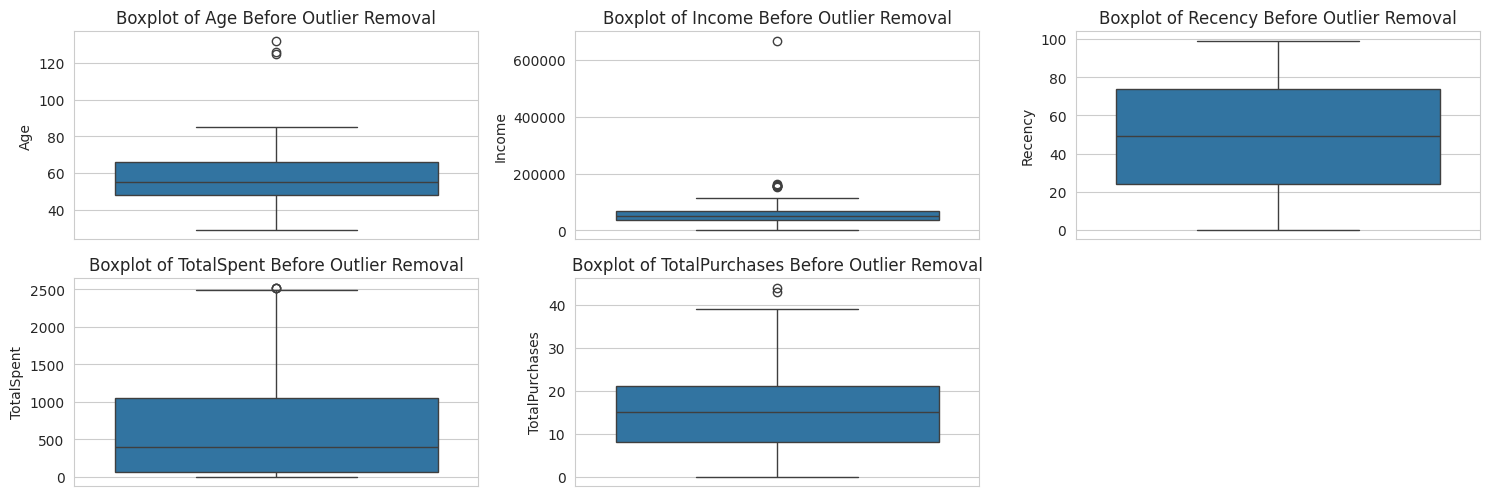

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns
numerical_cols = [
    "Age", "Income", "Recency", "TotalSpent","TotalPurchases"
]

# Plot boxplots before outlier removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col} Before Outlier Removal")
plt.tight_layout()
plt.show()

here we can remove the outliers on the Income by IQR method

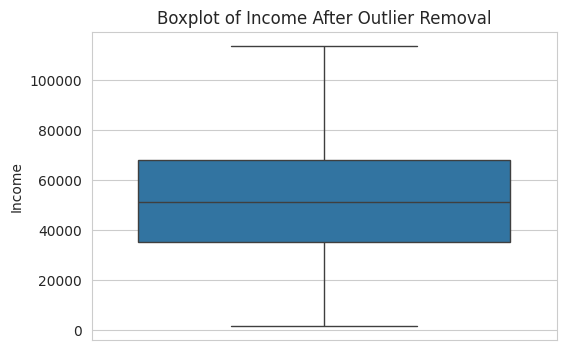

Original Data: 2240 rows
Cleaned Data: 2232 rows


In [ ]:
# Compute Q1, Q3, and IQR for Income
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from Income
df_cleaned = df[(df["Income"] >= lower_bound) & (df["Income"] <= upper_bound)]

# Plot boxplot after outlier removal
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_cleaned["Income"])
plt.title("Boxplot of Income After Outlier Removal")
plt.show()

# Display the number of rows before and after
print(f"Original Data: {df.shape[0]} rows")
print(f"Cleaned Data: {df_cleaned.shape[0]} rows")


In [ ]:
from IPython.display import display

# Compute descriptive statistics before and after outlier removal
desc_stats = df[numerical_cols].describe().T
desc_stats_cleaned = df_cleaned[numerical_cols].describe().T

# Compute mode separately
mode_values = df[numerical_cols].mode().iloc[0]
mode_values_cleaned = df_cleaned[numerical_cols].mode().iloc[0]

# Compute variance
variance_values = df[numerical_cols].var()
variance_values_cleaned = df_cleaned[numerical_cols].var()

# Add mode and variance to the descriptive statistics table
desc_stats["Mode"] = mode_values
desc_stats["Variance"] = variance_values
desc_stats_cleaned["Mode"] = mode_values_cleaned
desc_stats_cleaned["Variance"] = variance_values_cleaned

# Display tables side by side using Colab Markdown
print("### **📊 Descriptive Statistics Before & After Outlier Removal**")

# Use pandas' display function for better visualization
print("\n#### **Before Outlier Removal**")
display(desc_stats)

print("\n#### **After Outlier Removal**")
display(desc_stats_cleaned)


### **📊 Descriptive Statistics Before & After Outlier Removal**

#### **Before Outlier Removal**


,count,mean,std,min,25%,50%,75%,max,Mode,Variance
Age,2240.0,56.194196,11.984069,29.0,48.00,55.0,66.00,132.0,49.0,1.436179e+02
Income,2240.0,52237.975446,25037.955891,1730.0,35538.75,51381.5,68289.75,666666.0,51381.5,6.268992e+08
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0,56.0,8.388237e+02
TotalSpent,2240.0,605.798214,602.249288,5.0,68.75,396.0,1045.50,2525.0,46.0,3.627042e+05
TotalPurchases,2240.0,14.862054,7.677173,0.0,8.00,15.0,21.00,44.0,7.0,5.893898e+01



#### **After Outlier Removal**


,count,mean,std,min,25%,50%,75%,max,Mode,Variance
Age,2232.0,56.207437,11.990340,29.0,48.00,55.0,66.00,132.0,49.0,1.437682e+02
Income,2232.0,51630.926971,20601.679542,1730.0,35434.75,51381.5,68118.00,113734.0,51381.5,4.244292e+08
Recency,2232.0,49.111111,28.952893,0.0,24.00,49.0,74.00,99.0,56.0,8.382700e+02
TotalSpent,2232.0,605.596326,601.444172,5.0,69.00,396.5,1044.25,2525.0,46.0,3.617351e+05
TotalPurchases,2232.0,14.860215,7.622844,0.0,8.00,15.0,21.00,43.0,7.0,5.810775e+01


* High-income outliers were removed, making the dataset more reliable for analysis.

* Variance of Income decreased, showing that the dataset became more consistent after outlier removal.

* All other data remained stable, confirming that it did not contain significant outliers.


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

**(1) Distribution for Response**

Each customer either accepts the offer (1) or rejects it (0).
Since there are only two possible values, it fits a Bernoulli (special case of Binomial with n=1).

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import binom

# Probability of accepting the offer
p_accept = df_cleaned['Response'].astype('int').mean()  # Proportion of 1s
p_reject = 1-p_accept

# Expected value for binomial distribution
n_trials = 1  # Since each customer either accepts (1) or not (0)
expected_value = n_trials * p_accept

print(f"Probability of Acceptance: {p_accept}")
print(f"Probability of rejection: {p_reject}")
print(f"Expected Value: {expected_value}")


Probability of Acceptance: 0.1496415770609319
Probability of rejection: 0.8503584229390682
Expected Value: 0.1496415770609319


**(2)** **Distribution for Income**

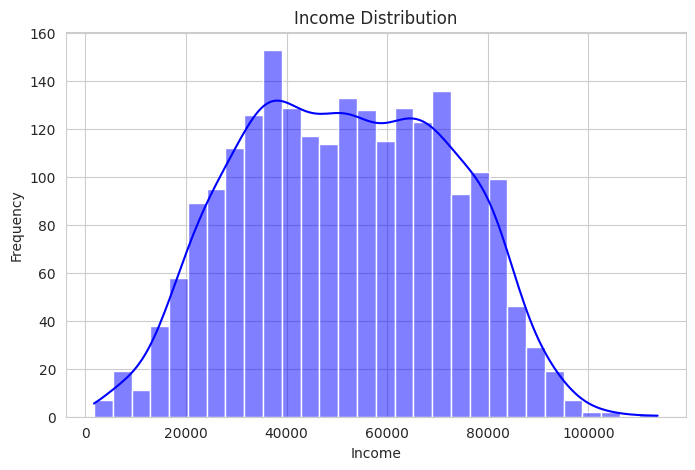

Skewness: 0.013456297753127624
Kurtosis: -0.8245349712056935


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Plot histogram & KDE to visualize distribution
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Income'], bins=30, kde=True, color="blue")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# Check Skewness and Kurtosis
skewness = df_cleaned['Income'].skew()
kurtosis = df_cleaned['Income'].kurtosis()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


 skewness value close to zero suggests a nearly normal distribution with no strong skew

Expected value for Income

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats

income_data = df_cleaned['Income']

# Compute mean (μ) and standard deviation (σ)
mu = np.mean(income_data)
sigma = np.std(income_data, ddof=1)  # Using sample standard deviation

# Expected value (Same as mean for normal distribution)
expected_value = mu

# Median (Same as mean for normal distribution)
median_income = mu

# Mode (For normal distribution, mode = mean)
mode_income = mu

# Print results
print(f"Normal Distribution Parameters: μ = {mu:.2f}, σ = {sigma:.2f}")
print(f"Expected Income (Mean): {expected_value:.2f}")


Normal Distribution Parameters: μ = 51630.93, σ = 20601.68
Expected Income (Mean): 51630.93


 Probability Calculations

In [ ]:
import scipy.stats as stats
import numpy as np


# Compute mean (μ) and standard deviation (σ) of normal distribution
mu = np.mean(income_data)
sigma = np.std(income_data, ddof=1)  # Sample standard deviation

# Define thresholds
lower_threshold = 50000
upper_threshold = 100000

# Compute probabilities using the Normal CDF
p_less_50k = stats.norm.cdf(lower_threshold, loc=mu, scale=sigma)
p_less_100k = stats.norm.cdf(upper_threshold, loc=mu, scale=sigma)
p_greater_100k = 1 - p_less_100k
p_between_50k_100k = p_less_100k - p_less_50k

# Print results
print(f"P(Income < 50K): {p_less_50k:.4f}")
print(f"P(50K < Income < 100K): {p_between_50k_100k:.4f}")
print(f"P(Income > 100K): {p_greater_100k:.4f}")



P(Income < 50K): 0.4685
P(50K < Income < 100K): 0.5221
P(Income > 100K): 0.0094


* The response variable follows a binomial distribution, and we have calculated the probability (P) and the expected mean.
* The income variable follows a normal distribution, and we have calculated its mean and corresponding probabilities.

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

Relationship Between Income & Spending

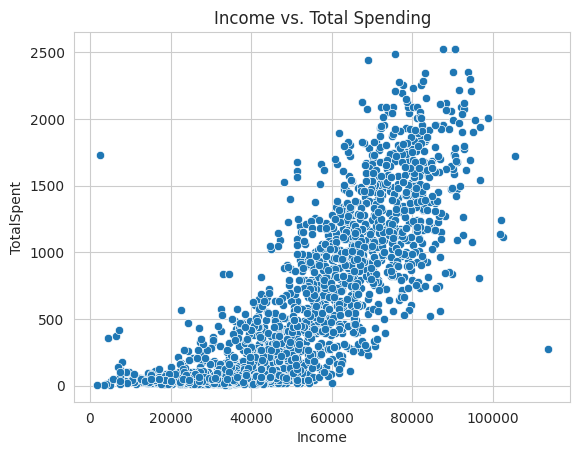

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df_cleaned["Income"], y=df["TotalSpent"])
plt.title("Income vs. Total Spending")
plt.show()


* The plot suggests a positive relationship between income and total spending. As income increases, total spending also tends to rise.
* The relationship appears curved, suggesting that spending does not increase at a constant rate with income. Instead, higher-income individuals may spend proportionally less than lower-income individuals.

Relationship Between Recency & Spending

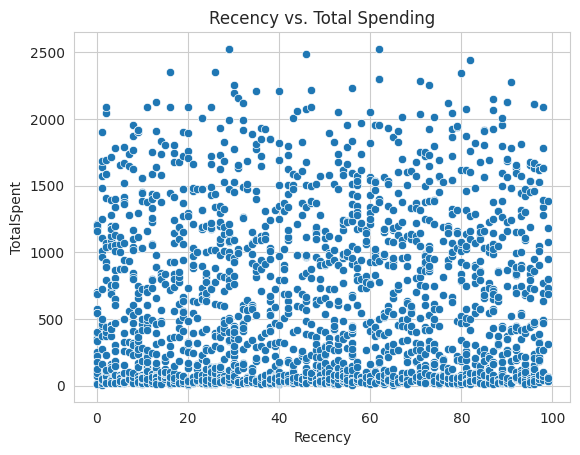

In [ ]:
sns.scatterplot(x=df_cleaned["Recency"], y=df["TotalSpent"])
plt.title("Recency vs. Total Spending")
plt.show()


The points are widely scattered, meaning that spending does not clearly depend on recency.
Customers who made recent purchases (low recency) are not necessarily high spenders.

Impact of Kids

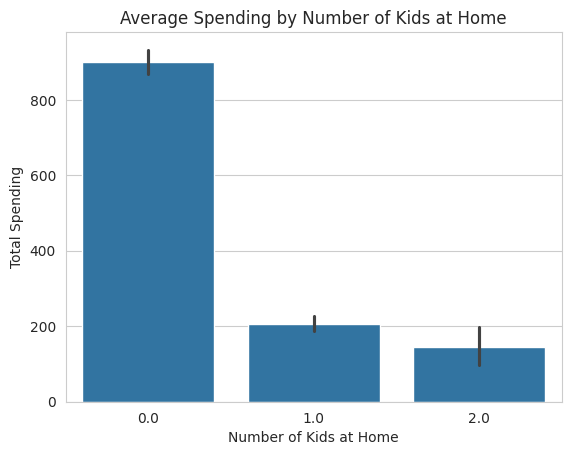

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=df_cleaned["Kidhome"], y=df["TotalSpent"], estimator=np.mean)
plt.title("Average Spending by Number of Kids at Home")
plt.xlabel("Number of Kids at Home")
plt.ylabel("Total Spending")
plt.show()


This bar chart clearly shows that customers with no kids at home (Kidhome = 0) have significantly higher total spending compared to those with 1 or 2 kids.

Impact of Teens

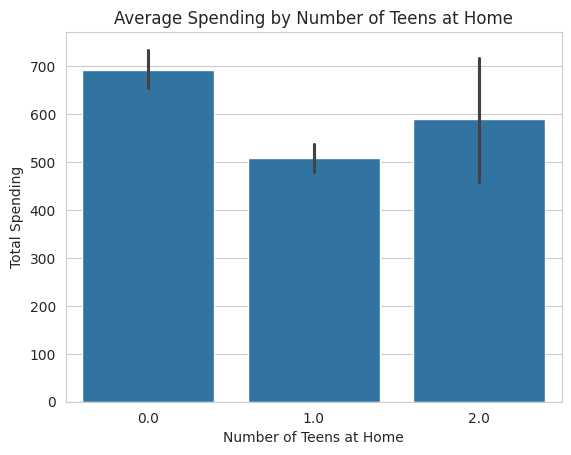

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=df_cleaned["Teenhome"], y=df["TotalSpent"], estimator=np.mean)
plt.title("Average Spending by Number of Teens at Home")
plt.xlabel("Number of Teens at Home")
plt.ylabel("Total Spending")
plt.show()

Customers with 0 teens at home also spend the most, similar to the kids' plot.
However, spending is somewhat higher for those with 2 teens than those with 1, which could indicate that families with older children have more flexible spending habits.

Education level impact on spending

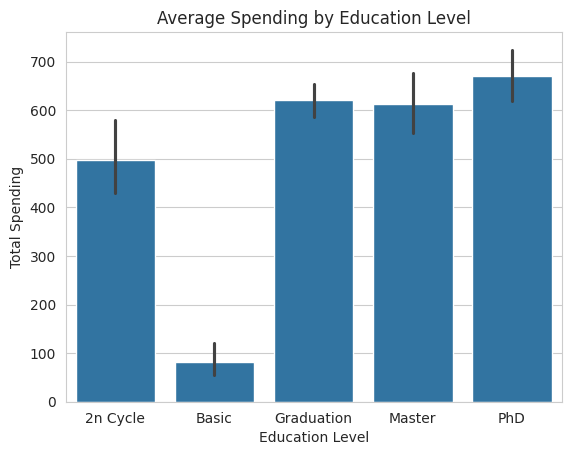

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.barplot(x=df_cleaned["Education"], y=df["TotalSpent"], estimator=np.mean)
plt.title("Average Spending by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Total Spending")
plt.show()


The data suggests a positive correlation between education level and spending.


Maritial status & spending

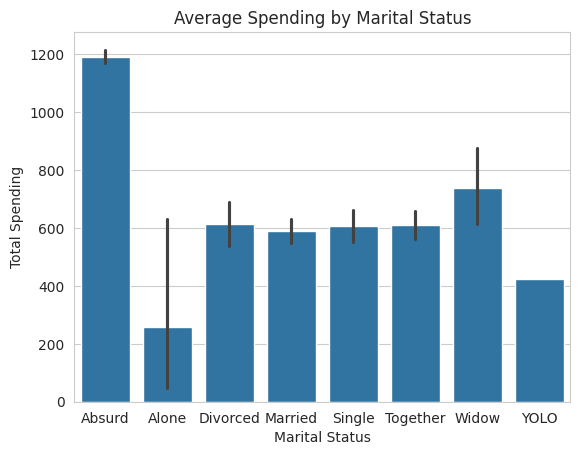

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.barplot(x=df_cleaned["Marital_Status"], y=df["TotalSpent"], estimator=np.mean)
plt.title("Average Spending by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Total Spending")
plt.show()


Customer segmentation

In [ ]:
# create RFM (Recency[days since last purchase], Frequency[total number of purchses], Monetary[total amount spent]) features

rfm = df_cleaned[["Id", "Recency", "TotalPurchases", "TotalSpent"]]
rfm.rename(columns={"TotalPurchases": "Frequency", "TotalSpent": "Monetary"}, inplace=True)

<ipython-input-101-937d863aee01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm.rename(columns={"TotalPurchases": "Frequency", "TotalSpent": "Monetary"}, inplace=True)


In [ ]:
# Assign RFM Scores (Using Quartiles)

rfm["R_Score"] = pd.qcut(rfm["Recency"], q=4, labels=[4, 3, 2, 1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"], q=4, labels=[1, 2, 3, 4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], q=4, labels=[1, 2, 3, 4])

rfm["RFM_Score"] = rfm["R_Score"].astype(str) + rfm["F_Score"].astype(str) + rfm["M_Score"].astype(str)

<ipython-input-102-e31d423e7fd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["R_Score"] = pd.qcut(rfm["Recency"], q=4, labels=[4, 3, 2, 1])
<ipython-input-102-e31d423e7fd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["F_Score"] = pd.qcut(rfm["Frequency"], q=4, labels=[1, 2, 3, 4])
<ipython-input-102-e31d423e7fd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [ ]:
rfm

,Id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1826,0,15,1190,4,2,4,424
1,1,0,18,577,4,3,3,433
2,10476,0,11,251,4,2,2,422
3,1386,0,4,11,4,1,1,411
4,5371,0,8,91,4,1,2,412
...,...,...,...,...,...,...,...,...
2235,10142,99,20,689,1,3,3,133
2236,5263,99,5,55,1,1,1,111
2237,22,99,14,309,1,2,2,122
2238,528,99,20,1383,1,3,4,134


In [ ]:
rfm["RFM_Score"].value_counts()


,count
RFM_Score,
311,137
411,130
111,128
211,104
422,92
122,89
322,83
233,79
144,78


In [ ]:
# define customer segments
def segment_customers(rfm_score):
    if int(rfm_score) >= 333:  # High Recency, Frequency, and Monetary
        return "High Value"
    elif int(rfm_score) >= 222:  # Medium range customers
        return "Medium Value"
    else:  # Low Recency, Frequency, and Monetary
        return "Low Value"

rfm["Segment"] = rfm["RFM_Score"].apply(segment_customers)

<ipython-input-105-09a3e8059d31>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm["Segment"] = rfm["RFM_Score"].apply(segment_customers)


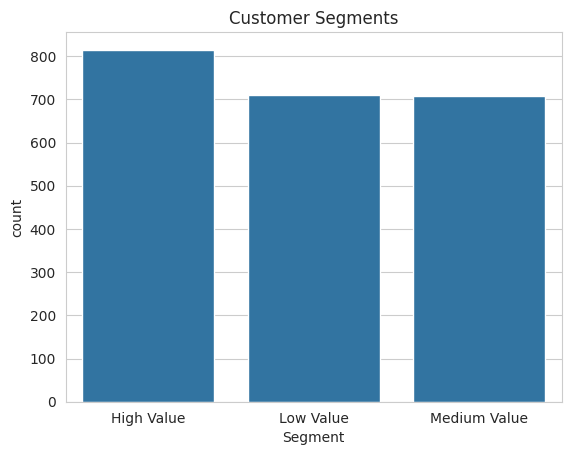

In [ ]:
# Visualize customer segments

sns.countplot(x=rfm["Segment"], order=rfm["Segment"].value_counts().index)
plt.title("Customer Segments")
plt.show()


<ipython-input-107-8e8ebed81f51>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=rfm["Segment"],


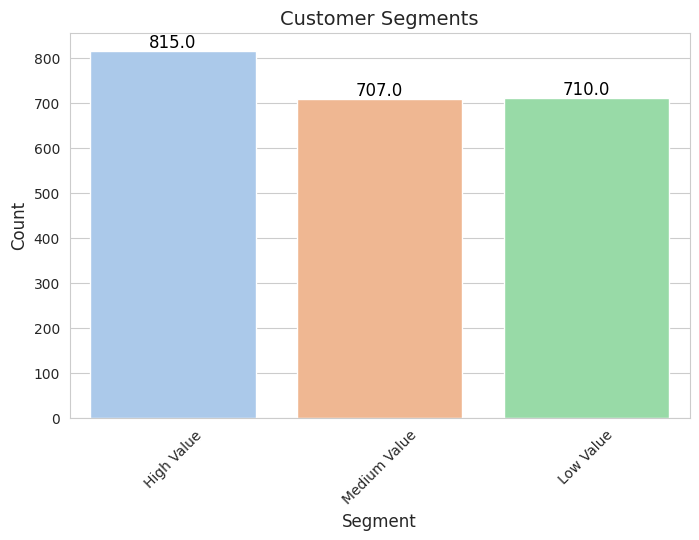

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x=rfm["Segment"],
                   order=["High Value", "Medium Value", "Low Value"],
                   palette="pastel")

# Add count labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=45)
plt.title("Customer Segments", fontsize=14)
plt.xlabel("Segment", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

The High-Value segment has the largest number of customers, indicating strong revenue potential, while the Medium and Low-Value segments are nearly equal

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

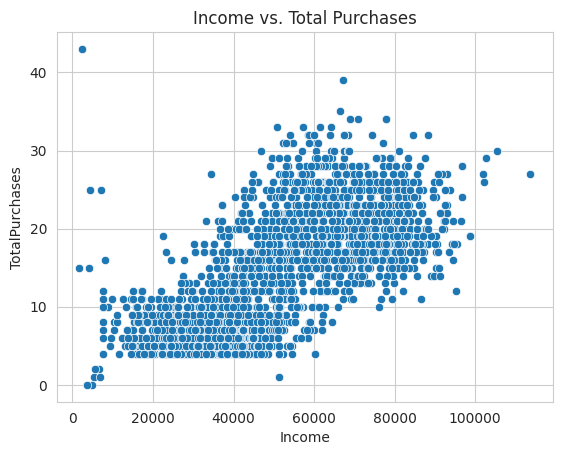

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df_cleaned["Income"], y=df_cleaned["TotalPurchases"])
plt.title("Income vs. Total Purchases")
plt.show()

**Insights:**
* Higher income generally leads to more purchases.
*  Most customers have incomes between $20,000-$80,000 and make 5-30 purchases.

**Recommendations:**
* Target High-Income Customers with premium products and exclusive offers.
* Introduce Discounts for Low-Income Groups to encourage more purchases.

In [ ]:
df_cleaned = df_cleaned[(df_cleaned['Age'] >= 18) & (df_cleaned['Age'] <= 90)]  # Keep ages between 18 and 90

<Axes: ylabel='Age'>

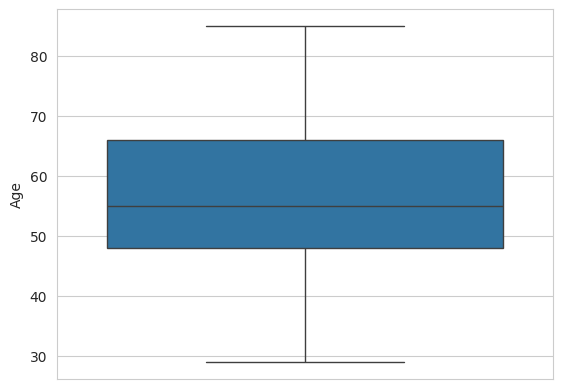

In [ ]:
sns.boxplot(df_cleaned["Age"])

<ipython-input-111-4d76d84cd31f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned["AgeGroup"], y=df_cleaned["TotalSpent"], palette="pastel")


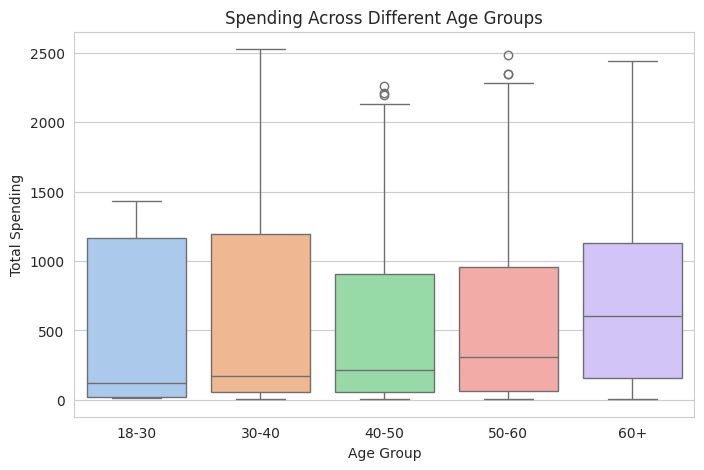

In [ ]:

df_cleaned["AgeGroup"] = pd.cut(df_cleaned["Age"], bins=[18, 30, 40, 50, 60, 100],
                        labels=["18-30", "30-40", "40-50", "50-60", "60+"])

plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned["AgeGroup"], y=df_cleaned["TotalSpent"], palette="pastel")
plt.title("Spending Across Different Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Total Spending")
plt.show()


**Insights:**
* All age groups show high spending variability, with some outliers spending significantly more.
* Older consumers (60+) tend to spend more on average compared to younger age groups.

**Recommendations:**
* Identify and target outliers with premium product recommendations and loyalty rewards.
* Since the 60+ group spends more, create tailored promotions, discounts, or exclusive deals for them.

<ipython-input-112-153c74840305>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


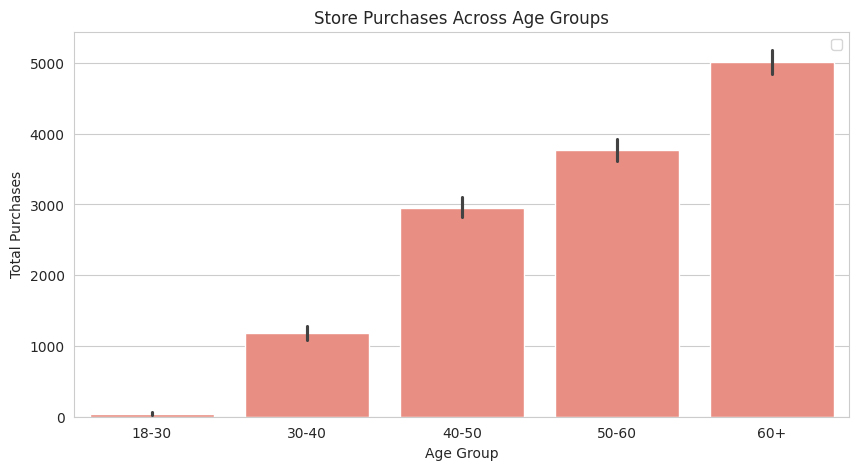

In [ ]:
plt.figure(figsize=(10,5))

# Plot Store Purchases
sns.barplot(x=df_cleaned["AgeGroup"], y=df_cleaned["NumStorePurchases"], estimator=sum, color="salmon")

plt.title("Store Purchases Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Total Purchases")
plt.legend()
plt.show()


<ipython-input-113-7d903b3072f5>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


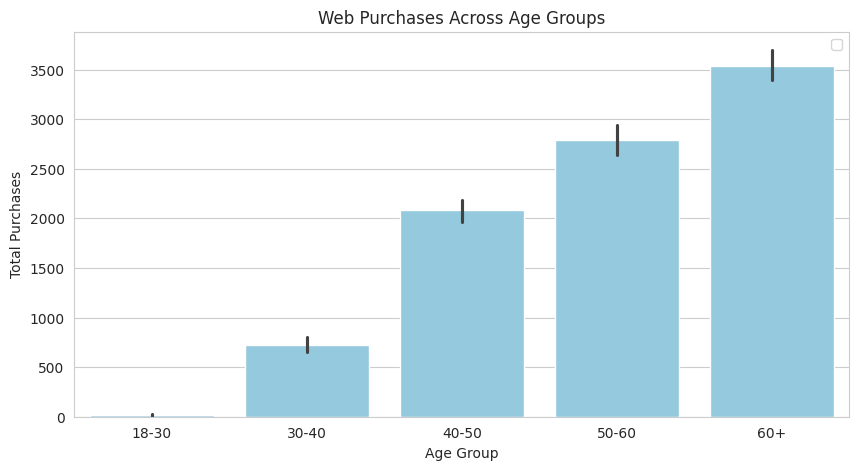

In [ ]:
plt.figure(figsize=(10,5))

# Plot Web Purchases
sns.barplot(x=df_cleaned["AgeGroup"], y=df_cleaned["NumWebPurchases"], estimator=sum, color="skyblue")


plt.title("Web Purchases Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Total Purchases")
plt.legend()
plt.show()

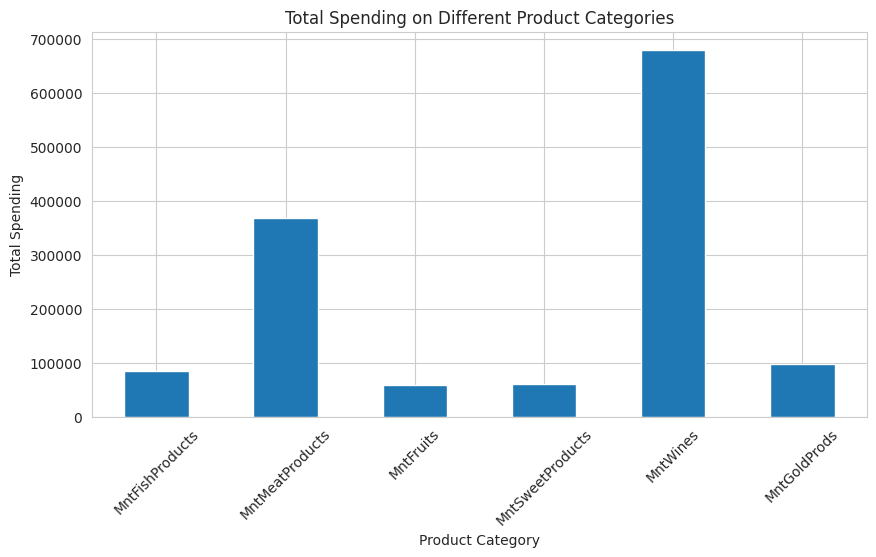

In [ ]:
# Summing total spending for each product category
total_spent = df_cleaned[["MntFishProducts", "MntMeatProducts", "MntFruits",
                   "MntSweetProducts", "MntWines", "MntGoldProds"]].sum()

plt.figure(figsize=(10,5))
total_spent.plot(kind="bar")

plt.title("Total Spending on Different Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()


**Insights:**
* Customers spend significantly more on wines compared to other product categories.
* Spending on meat products is also high, though not as much as wine.

**Recommendations:**
* Introduce exclusive deals, loyalty programs, or discounts on bulk wine purchases to further drive sales.
* Since both categories are popular, create combo deals that include wines and meat products to encourage higher spending.

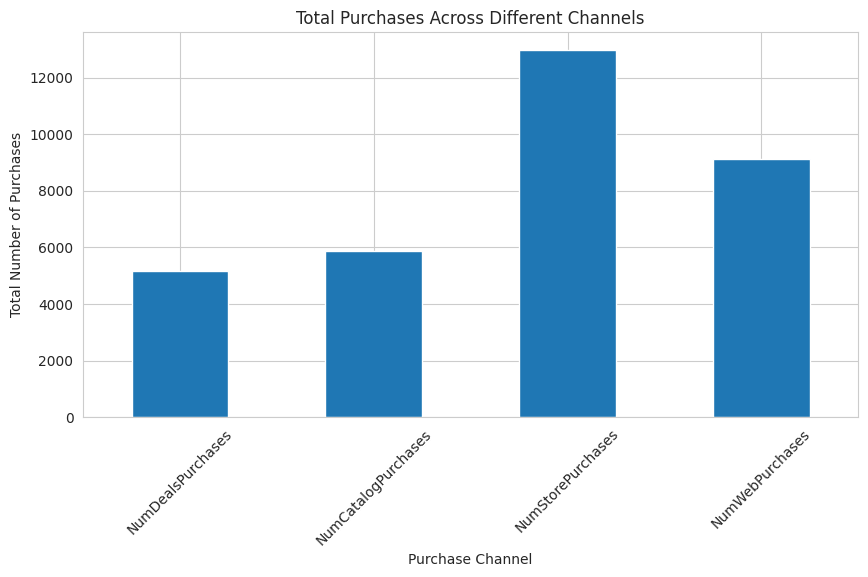

In [ ]:
# Summing total purchases for each channel
total_purchases = df_cleaned[["NumDealsPurchases", "NumCatalogPurchases", "NumStorePurchases",
                       "NumWebPurchases"]].sum()

# Plot
plt.figure(figsize=(10,5))
total_purchases.plot(kind="bar")

plt.title("Total Purchases Across Different Channels")
plt.xlabel("Purchase Channel")
plt.ylabel("Total Number of Purchases")
plt.xticks(rotation=45)
plt.show()


**Insights:**
* The highest number of purchases are made in physical stores, followed by online purchases.
* Purchases made through deals and catalogs are relatively lower compared to stores and online.

Recommendations:
* Since web purchases are already significant, optimizing the website and offering exclusive online deals can drive more sales.
* Running targeted promotions or discounts on catalog and deal-based purchases could help boost engagement in these lower-performing channels.

<ipython-input-116-0f031c0c6b2b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(data.keys()), y=list(data.values()), palette="pastel")


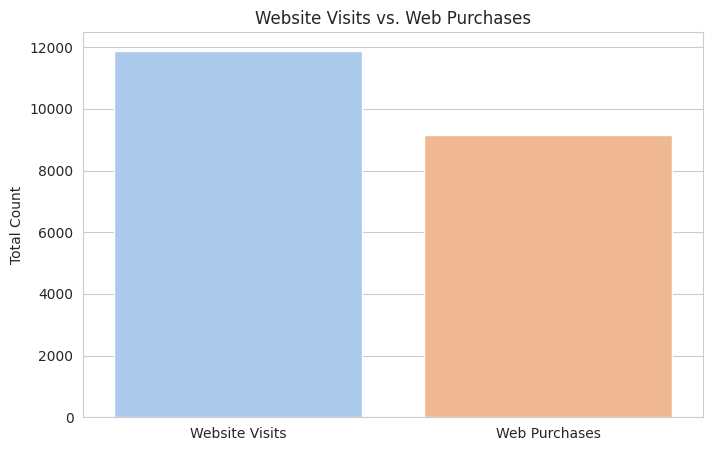

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summing total visits and total web purchases
total_visits = df_cleaned["NumWebVisitsMonth"].sum()
total_purchases = df_cleaned["NumWebPurchases"].sum()

# Data for plotting
data = {"Website Visits": total_visits, "Web Purchases": total_purchases}

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=list(data.keys()), y=list(data.values()), palette="pastel")

# Add labels
plt.title("Website Visits vs. Web Purchases")
plt.ylabel("Total Count")
plt.show()


In [ ]:
# Calculate total visits and purchases
total_visits = df_cleaned["NumWebVisitsMonth"].sum()
total_purchases = df_cleaned["NumWebPurchases"].sum()

# Calculate conversion rate
conversion_rate = (total_purchases / total_visits) * 100

# Display the results
print(f"Total Website Visits: {total_visits}")
print(f"Total Web Purchases: {total_purchases}")
print(f"Conversion Rate: {conversion_rate:.2f}%")


Total Website Visits: 11890
Total Web Purchases: 9139
Conversion Rate: 76.86%


**Insights:**
* The conversion rate of 76.86% indicates that a large proportion of website visitors make purchases.
* While the conversion rate is strong, there is still room to optimize the user experience and marketing strategies to increase conversions further.

Recommendations:
* Implement personalized recommendations and limited-time offers to encourage even higher conversion rates.
* Analyze drop-off points in the purchase process and streamline checkout to minimize friction for customers.

<ipython-input-121-3f1d436a66ab>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_rate = df_cleaned.groupby("AgeGroup")["Response"].mean() * 100
<ipython-input-121-3f1d436a66ab>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_rate.index, y=response_rate.values, palette="coolwarm")


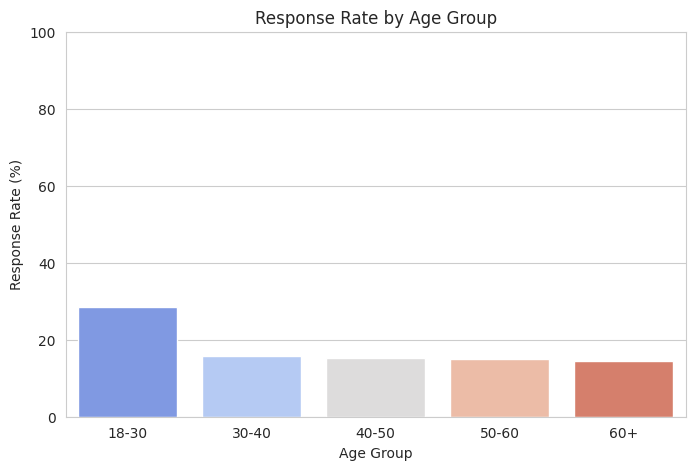

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Calculate Response Rate for Each Age Group
df_cleaned["Response"] = df_cleaned["Response"].astype(int)
response_rate = df_cleaned.groupby("AgeGroup")["Response"].mean() * 100

# Step 3: Plot the Response Rate
plt.figure(figsize=(8,5))
sns.barplot(x=response_rate.index, y=response_rate.values, palette="coolwarm")
plt.title("Response Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Response Rate (%)")
plt.ylim(0, 100)  # Keep within 0-100%
plt.show()


**Insights:**
* The response rate is highest among the 18-30 age group, suggesting they are more receptive to marketing efforts.
* The response rate decreases for older age groups, with the lowest engagement from the 60+ category.

**Recommendations:**

Age-Specific Marketing Strategies:

* Leverage social media, influencer marketing, and interactive campaigns to sustain high engagement.
* Use personalized email marketing, discounts, and traditional advertising (TV, print) to improve response rates.

Segmented Promotions:

* Offer targeted deals based on age group preferences to encourage engagement.
Experiment with different communication channels suited to each age group.

<ipython-input-122-aacc0cb7b522>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_rate_income = df_cleaned.groupby("IncomeGroup")["Response"].mean() * 100
<ipython-input-122-aacc0cb7b522>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_rate_income.index, y=response_rate_income.values, palette="viridis")


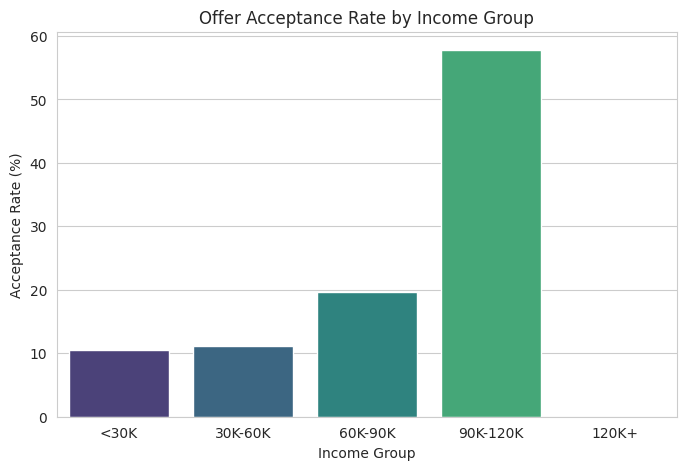

In [ ]:
# Group income into bins
df_cleaned["IncomeGroup"] = pd.cut(df_cleaned["Income"], bins=[0, 30000, 60000, 90000, 120000, 200000],
                           labels=["<30K", "30K-60K", "60K-90K", "90K-120K", "120K+"])

# Calculate response rate for each income group
response_rate_income = df_cleaned.groupby("IncomeGroup")["Response"].mean() * 100

# Plot response rate by income group
plt.figure(figsize=(8,5))
sns.barplot(x=response_rate_income.index, y=response_rate_income.values, palette="viridis")
plt.title("Offer Acceptance Rate by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Acceptance Rate (%)")
plt.show()


**Insights:**

* The high income group has the highest offer acceptance rate (55%).
* Lower income groups  have low acceptance (10%), indicating limited engagement.

**Recommendations:**

* Focus marketing efforts on the 90K-120K group with premium offers and loyalty programs.
* Introduce budget-friendly deals for lower-income groups to increase engagement.

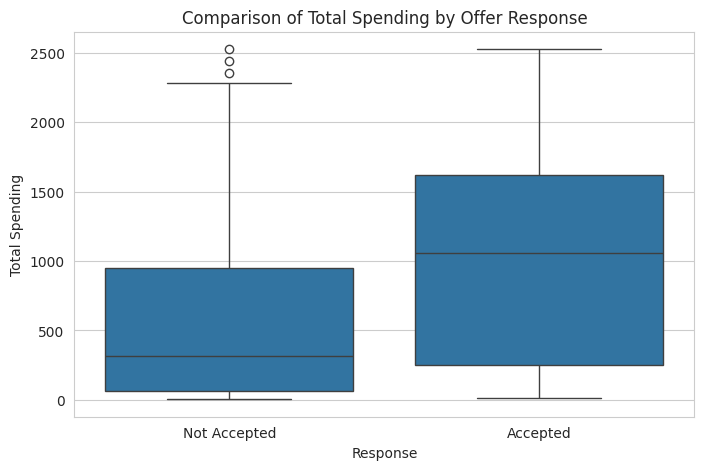

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_cleaned["Response"], y=df_cleaned["TotalSpent"])
plt.xticks([0, 1], ["Not Accepted", "Accepted"])
plt.title("Comparison of Total Spending by Offer Response")
plt.xlabel("Response")
plt.ylabel("Total Spending")
plt.show()

**Insights:**

* Customers who accepted the offer had higher median spending than those who didn’t.
* The spending distribution is wider for accepted offers, indicating potential high-value customers.

**Recommendations:**

* Target offer-accepting customers with personalized deals to maximize spending.
* Use incentives for non-accepting customers to encourage engagement and spending.

<ipython-input-126-46c162bcdc01>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_salary_by_age = df_cleaned.groupby("AgeGroup")["Income"].mean().reset_index()
<ipython-input-126-46c162bcdc01>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AgeGroup", y="Income", data=avg_salary_by_age, palette="coolwarm")


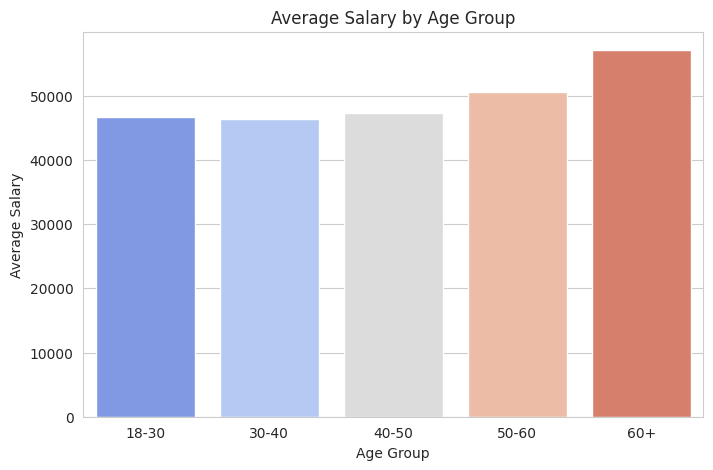

In [ ]:
avg_salary_by_age = df_cleaned.groupby("AgeGroup")["Income"].mean().reset_index()

# Plot the data
plt.figure(figsize=(8, 5))
sns.barplot(x="AgeGroup", y="Income", data=avg_salary_by_age, palette="coolwarm")

# Labels and title
plt.xlabel("Age Group")
plt.ylabel("Average Salary")
plt.title("Average Salary by Age Group")

# Show the plot
plt.show()

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍